### Project Name : Property Prices Segmentation 
### Authors
- [Ahmed Abdullah](https://github.com/ahmedembeddedx)
- [Zaeem ul Islam](https://github.com/mightyflavor)


# 🏡 **Unlocking the Secrets of Real Estate: A Journey into Homeownership and Beyond!**

![Home Image](https://i.ibb.co/DkfZnfD/image.png)

Welcome to the fascinating world of Mortgage Data, where numbers and trends come to life, telling the captivating story of Default Prediction, Customer Segmentation, and Property Purchase Trends. 🚀


## 1 *Necessary Libraries*

## 2 *Loading Dataset & Head Entries*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd
import seaborn as sns
import swifter
from scipy.stats import zscore
from scipy import stats
from pandas.plotting import scatter_matrix

## 2 *Loading Dataset & Head Entries*

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 3 *Data Preprocessing*

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
data.describe(include="all")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


### i. Dimension Reduction - I

In [37]:
columns_to_keep = [
 'price', 
 'bedrooms', 
 'bathrooms', 
 'sqft_living',
 'sqft_lot', 
 'floors', 
 'waterfront', 
 'view', 
 'condition', 
 'grade',
 'sqft_above', 
 'sqft_basement', 
 'yr_built', 
 'yr_renovated',
 'sqft_living15', 
 'sqft_lot15']

data = data[columns_to_keep]

In [7]:
memory_usage = data.memory_usage(deep=True).sum()

print(f"Memory usage of the DataFrame: {memory_usage / (1024**2):.2f} MB")

Memory usage of the DataFrame: 2.64 MB


### ii. Updating tuple conventions

In [8]:
data.columns = data.columns.str.strip().str.replace(' ', '_').str.lower()

## 4 **Data Cleaning**

### i. Replacing Outliers (IQR Method)

In [38]:
irrep=[
    'waterfront', 
    'view', 
    'condition', 
    'grade',
    'sqft_basement',
    'yr_renovated',
]

def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df.copy()

    if column_name not in irrep:
        df_filtered[column_name] = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)][column_name]

    return df_filtered

for column in columns_to_keep:
    data = remove_outliers(data, column)


In [14]:
data.shape[0]

21607

### ii. Dropping Duplicates

In [15]:
data = data.drop_duplicates()

### iii. Resetting the Indices

In [35]:
data = data.reset_index(drop=True)

## 5 *Data Distributions (Univariate Analysis)*

### i. Plotting Continous Data

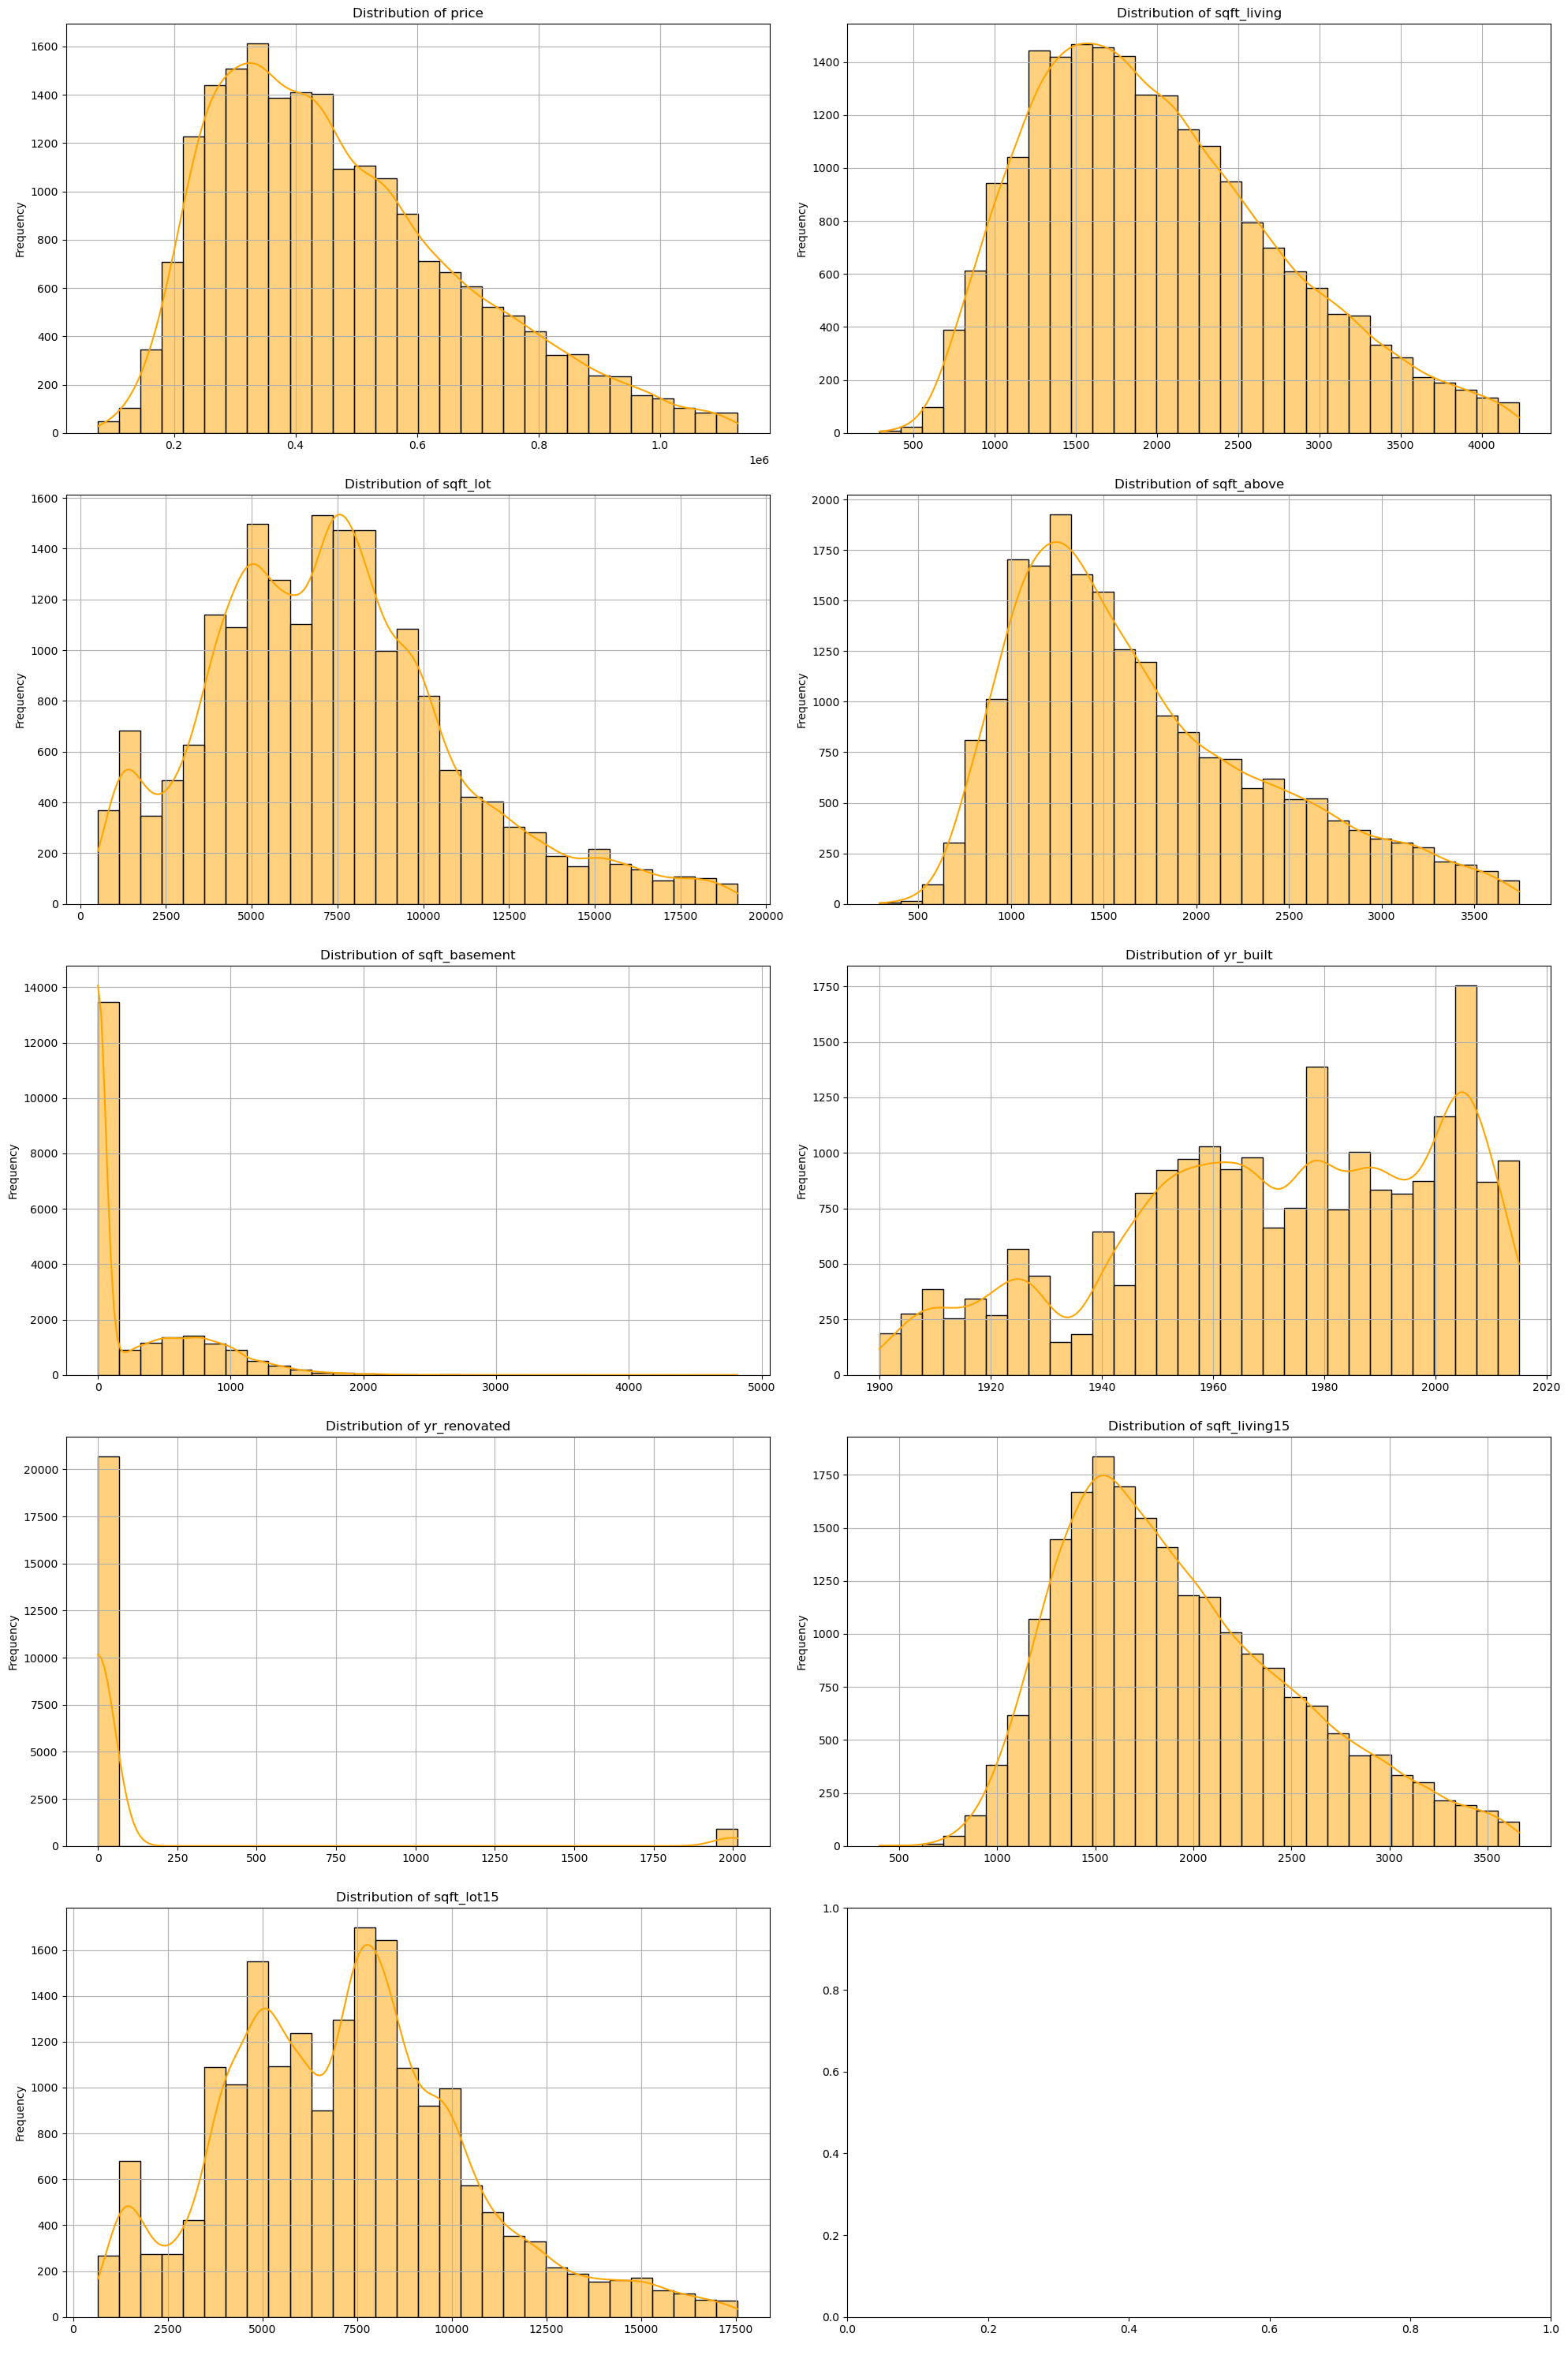

In [36]:
filtered_data = data[columns_to_keep]

histogram_columns = [
     'price', 
     'sqft_living',
     'sqft_lot', 
     'sqft_above', 
     'sqft_basement', 
     'yr_built',
     'yr_renovated',
     'sqft_living15', 
     'sqft_lot15'
]

num_rows = len(histogram_columns) // 2 + len(histogram_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 30))
axes = axes.flatten()

for i, column in enumerate(histogram_columns):
    sns.histplot(filtered_data[column], bins=30, kde=True, ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

# Interpretations from Graphs

- **Prices**
Prices exhibit a right-skewed distribution, indicating that the majority of properties fall within the range of 200k to 600k.

- **Square Root Living Area**
Square root of living areas is right-skewed, with a concentration of properties having an area between 1000sq and 2000sq.

- **Square Root Lot Area**
Square root of lot areas is right-skewed, suggesting that most properties have a lot size ranging from 5000sq to 10000sq.

- **Square Root Above Area**
Square root of above areas is right-skewed, indicating that most properties have an above area in the range of 1000sq to 1500sq.

- **Square Root Basements Area**
Square root of basements areas is right-skewed, with a notable observation that most properties don't have a basement area, resulting in a Gaussian bell curve.

- **Year Built**
The distribution of the year built is varied, but it is left-skewed, suggesting that the majority of cities were built after the 1960s.

- **Year Renovated**
The distribution of the year renovations occurred is highly right-skewed, indicating that the majority of renovations took place after the 1990s.

- **Square Root Living15**
Similar to the square root of living area, the square root of living15 follows a right-skewed trend, with a concentration of properties having an area similar to the living area.

- **Square Root Lot15**
Similar to the square root of lot area, the square root of lot15 follows a right-skewed trend, suggesting that most properties have a lot size similar to the lot area.


### ii. Plotting Categorical, Relatively Discrete and Ordinal Data

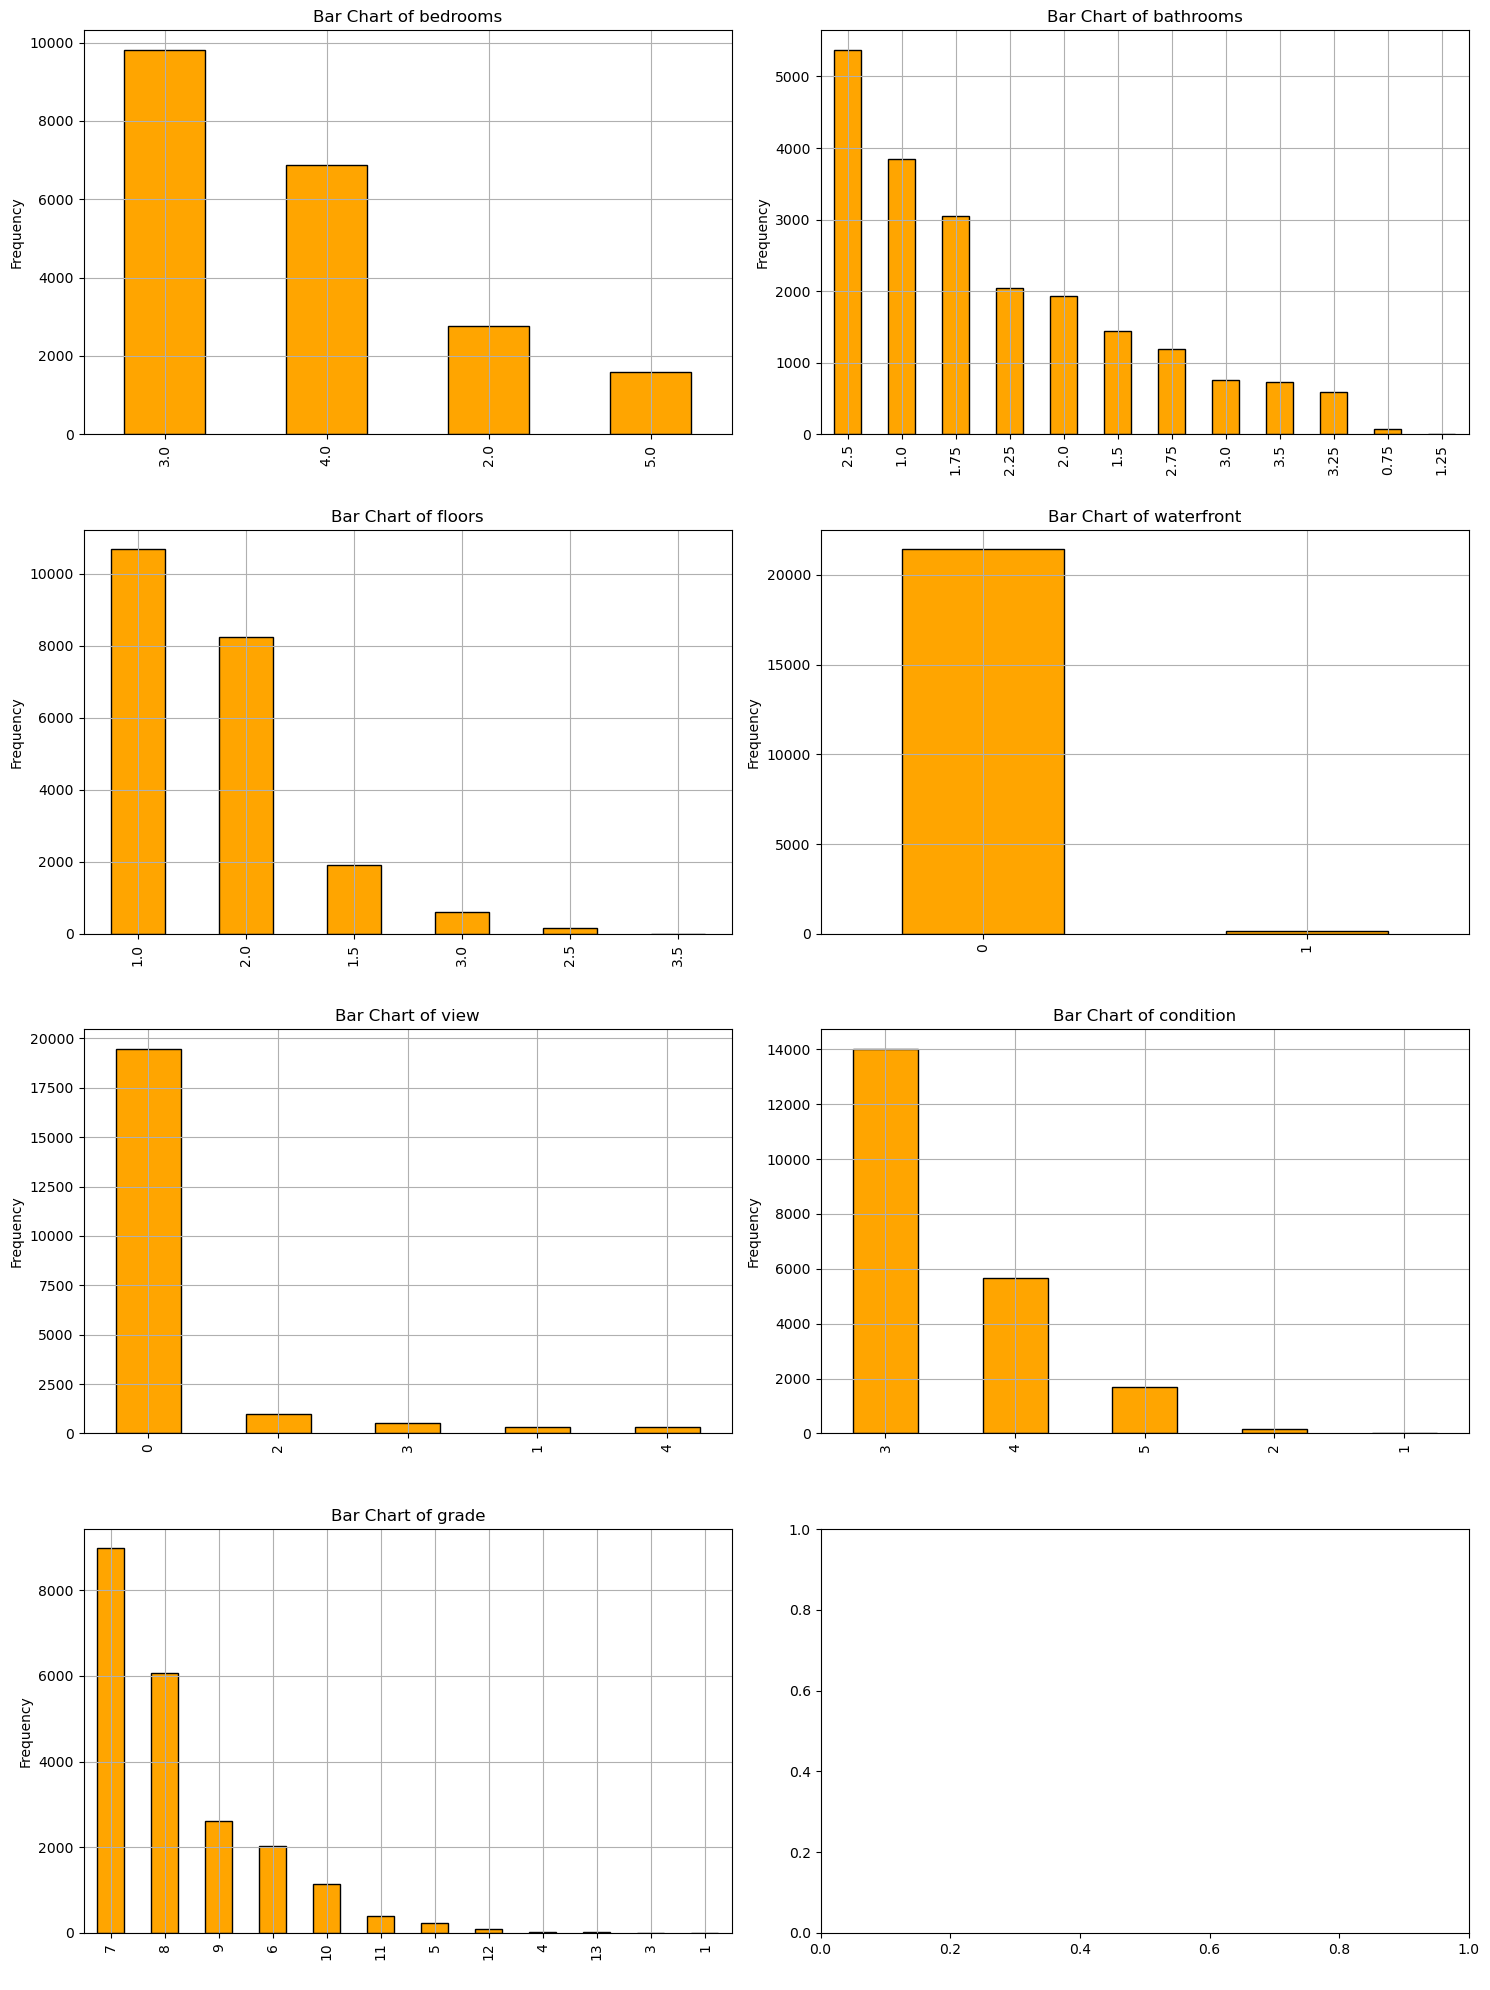

In [43]:
filtered_data = data[columns_to_keep]

bar_chart_columns = [
     'bedrooms', 
     'bathrooms', 
     'floors', 
     'waterfront', 
     'view', 
     'condition', 
     'grade'
]

num_rows = len(bar_chart_columns) // 2 + len(bar_chart_columns) % 2
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 20))
axes = axes.flatten()

sampled_data = filtered_data

for i, column in enumerate(bar_chart_columns):
    top_values = sampled_data[column].value_counts().nlargest(20)
    top_values.plot(kind='bar', ax=axes[i], edgecolor='black', color='orange')
    axes[i].set_title(f'Bar Chart of {column}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()


# Interpretations from Bar Charts

- **Bedrooms**
The bar chart for bedrooms reveals that 3 bedrooms are the most common configuration among the sampled houses.

- **Bathrooms**
The distribution of bathrooms indicates that most houses have 2 full bathrooms and 1 half bathroom.

- **Floors**
The majority of houses have at least 1 floor, as suggested by the bar chart for the number of floors.

- **Waterfront**
The presence of waterfront in houses is negligible, as indicated by the bar chart.

- **View**
Almost all houses in the dataset have 0 view facings, as depicted by the bar chart for views.

- **Condition**
The distribution of house conditions shows that the condition of most houses is rated as 3.

- **Grade**
The bar chart for house grades suggests that the grade of the majority of houses is 7.


## 6 *Data Dependencies (Bivariate Analysis)*

In [44]:
def label_encode(data):
    unique_values = list(set(data))
    encoding_dict = {value: index for index, value in enumerate(unique_values)}
    encoded_data = [encoding_dict[value] for value in data]
    return encoded_data

def plot_hexbin(x_values, y_values, gridsize=(10, 7), cmap='Greens'):
    x_values_encoded = x_values if isinstance(x_values[0], (int, float)) else label_encode(x_values)
    y_values_encoded = y_values if isinstance(y_values[0], (int, float)) else label_encode(y_values)

    plt.hexbin(x=x_values_encoded, y=y_values_encoded, gridsize=gridsize, cmap=cmap)
    
    x_var_name = x_values.name if hasattr(x_values, 'name') else 'X Variable'
    y_var_name = y_values.name if hasattr(y_values, 'name') else 'Y Variable'
    plt.title(f'{x_var_name} vs {y_var_name}')
    
    plt.colorbar(label='Count')
    plt.show()

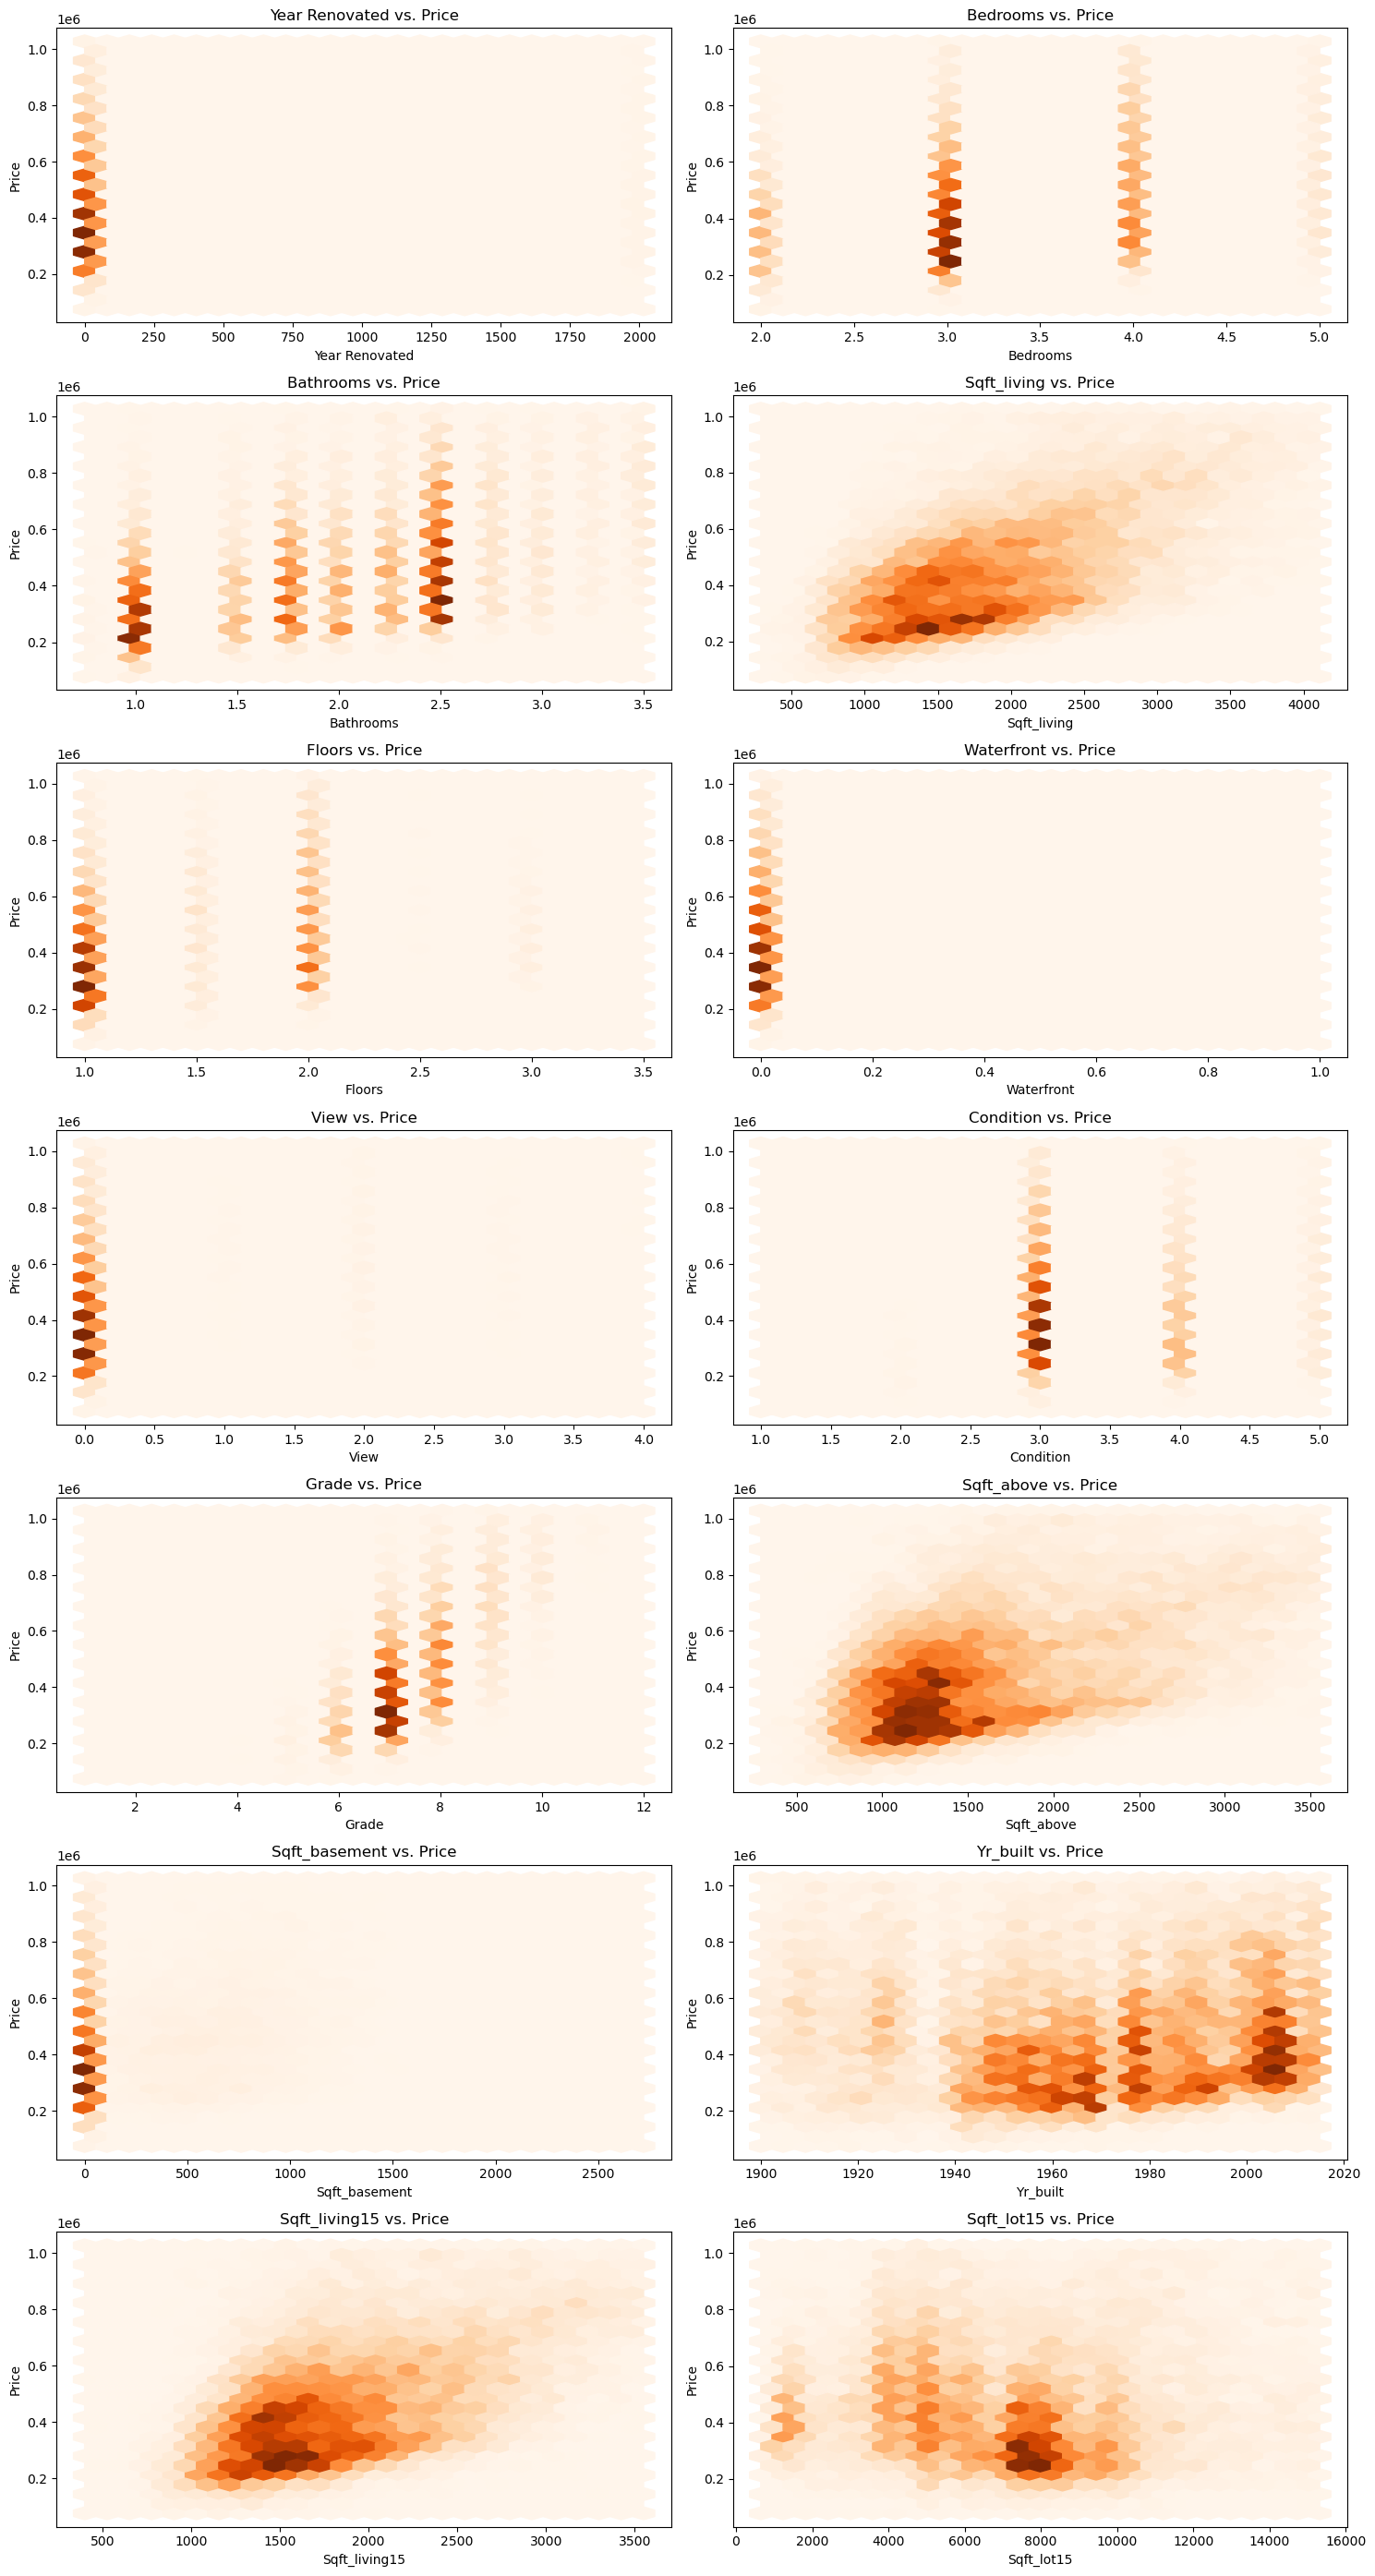

In [52]:
hexbin_variables = [
    'bedrooms',
    'bathrooms',
    'sqft_living',
    'floors',
    'waterfront',
    'view',
    'condition',
    'grade',
    'sqft_above',
    'sqft_basement',
    'yr_built',
    'sqft_living15',
    'sqft_lot15'
]

num_rows = (len(hexbin_variables) + 1) // 2
num_cols = min(2, len(hexbin_variables))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
axes = axes.flatten()

axes[0].hexbin(data['yr_renovated'], data['price'], gridsize=25, cmap='Oranges')
axes[0].set_title('Year Renovated vs. Price')
axes[0].set_xlabel('Year Renovated')
axes[0].set_ylabel('Price')

for i, variable in enumerate(hexbin_variables, 1):
    axes[i].hexbin(data[variable], data['price'], gridsize=25, cmap='Oranges')
    axes[i].set_title(f'{variable.capitalize()} vs. Price')
    axes[i].set_xlabel(f'{variable.capitalize()}')
    axes[i].set_ylabel('Price')


plt.tight_layout()
plt.show()
